#1.Import dependencies



In [1]:
#pytorch computer vision

import torch as tr
from torch import nn

#for computervision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader


In [2]:
torchvision.__version__

'0.17.1+cu121'

#2.Getting a dataset

the dataset used is FashionMNIST from torchvision.datasets .

link:https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [3]:
 #setup training data
train_data=datasets.FashionMNIST(
    root='data', #where to download data to
    train=True, #do we want the training dataset
    download=True, #do we want to download it
    transform=ToTensor(), #transforming the data to tensors
    target_transform=None #do we want to transform the labels
)

test_data=datasets.FashionMNIST(
    root='data', #where to download data to
    train=False, #do we want the training dataset
    download=True, #do we want to download it
    transform=ToTensor(), #transforming the data to tensors
    target_transform=None #do we want to transform the labels
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11147219.39it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201925.19it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3731281.39it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11328581.84it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data)

60000

In [5]:
len(test_data)

10000

In [6]:
image, label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class1=train_data.classes

In [8]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
label

9

#3. Visualizing the data

In [11]:
image,label=train_data[0]

image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

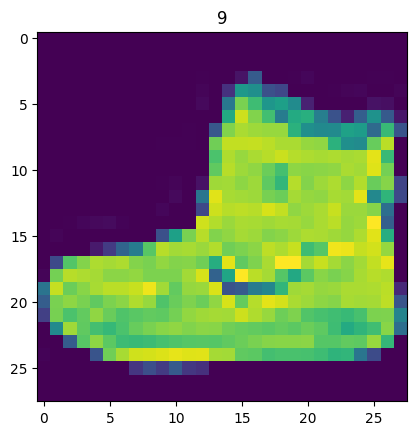

In [12]:
print(f'image shape : {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, '9')

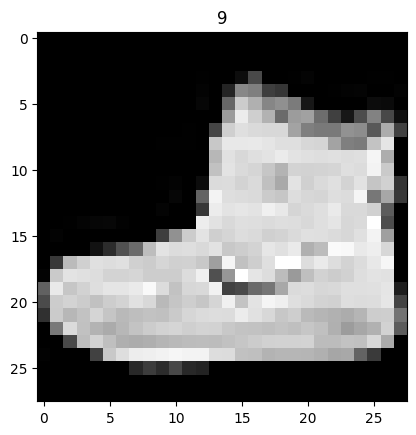

In [13]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(label)

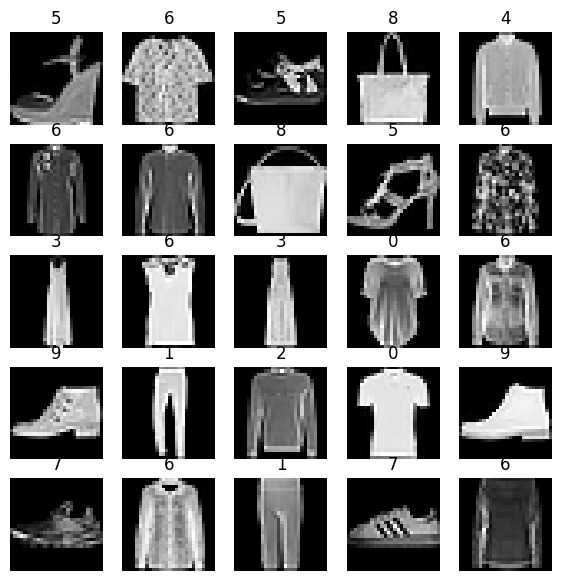

In [14]:
#plot more images

tr.manual_seed(13)

fig= plt.figure(figsize=(7,7)) #we can see 7 images

rows, cols=5,5. # we will have 25 images

for i in range(1,25+1):
  random_idx=tr.randint(0, len(train_data), size=[1]).item()
  img, label=train_data[random_idx]
  fig.add_subplot(5,5,i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(label)
  plt.axis(False);

In [15]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

#4.Prepare a dataloader

turs our data to python iterable, breaking into batches as we do not have enough memory to store 60000 images, breaking into batches of 32 images.



In [16]:
BATCH_SIZE=32


train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False
                              )
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d92ef949a20>,
 <torch.utils.data.dataloader.DataLoader at 0x7d92ef94bbe0>)

In [17]:
print(f'train dataloaders have {len(train_dataloader)} batches of {BATCH_SIZE} images')
print(f'test dataloaders have {len(test_dataloader)} batches of {BATCH_SIZE} images')

train dataloaders have 1875 batches of 32 images
test dataloaders have 313 batches of 32 images


In [18]:
#what's inside dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) #turn into iterable with iter and next batch to with next
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'tensor(7)')

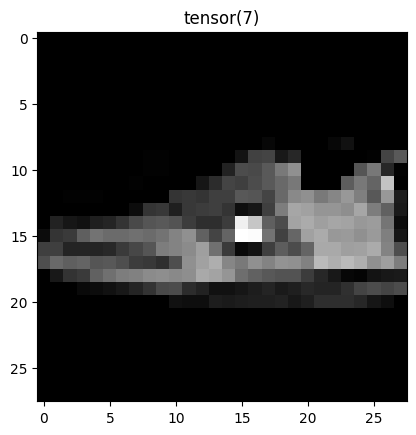

In [19]:
#show a sample
tr.manual_seed(13)
random_idx = tr.randint(1, len(train_features_batch), size=[1]).item()

img, label= train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(label)

#5. model0 : baseline model

In [20]:
#create a flatten layer
flatten_model=nn.Flatten()

#get a single samle

x=train_features_batch[0]
x.shape #-->[color_channels, height, width]

torch.Size([1, 28, 28])

In [21]:
output=flatten_model(x)
output.shape #28*28=784. -->[color_channels, (height*width)]

torch.Size([1, 784])

In [22]:
class FashionMNISTmodelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_layer: int,
               output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_layer ),
        nn.Linear(in_features=hidden_layer, out_features=output_shape )
    )

  def forward(self, x):
    return self.layer_stack(x)


In [23]:
tr.manual_seed(13)

model0=FashionMNISTmodelV0(
    input_shape=784, #this is 28*28
    hidden_layer=64,
    output_shape=10 # one for every class, 10
).to('cpu')

model0

FashionMNISTmodelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [24]:
dummy_x=tr.rand([1,1,28,28])
model0(dummy_x)

tensor([[-0.1593,  0.0976, -0.1159, -0.5365,  0.0185, -0.1427,  0.2879, -0.0577,
          0.1233, -0.1758]], grad_fn=<AddmmBackward0>)

##5.1. setup loss function, optimizer, evaluation metrics



In [25]:
import requests
from pathlib import Path
if Path('helper_functions.py').is_file() :
  print('helper_functions.py file alredy exists')
else:
  print('downloading helper_functions.py')
  request= requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

downloading helper_functions.py


In [26]:
#import the accuray metric

from helper_functions import accuracy_fn

#setup loss function
loss_fn = nn.CrossEntropyLoss()

#setup optimizer
optimizer=tr.optim.Adam(params=model0.parameters(),
                       lr=0.01)

##5.2. creating function to timeout experiments

In [27]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: tr.device=None):
  #prints differents btw start and end time
  total_time=end-start
  print(f'train time on {device} took {total_time:.3f} sec')
  return total_time

In [28]:
start_time=timer()
#some code here
end_time=timer()
print_train_time(start=start_time,
                 end=end_time,
                 device='cpu')

train time on cpu took 0.000 sec


6.240999999818087e-05

##5.3. creating a training loop and training it on batches of data

In [29]:
#import tqdm for progress bar
from tqdm.auto import tqdm

#set the seed and timer
tr.manual_seed(13)
train_time_start_cpu=timer()

#no. of epochs
epochs=3

#create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epoch} ---->')

  train_loss=0
  train_acc=0
  for batch, (X, y)  in enumerate(train_dataloader):
    model0.train()

    y_pred= model0(X)

    loss= loss_fn(y_pred, y)
    train_loss += loss #accumulate trainig loss
    train_acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch %400 == 0:
      print(f'looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')

  #divide total train loss by length of train dataloader
  train_loss /=len(train_dataloader)


  #testing
  test_loss, test_acc= 0, 0
  model0.eval()
  with tr.inference_mode():
    for X_test,y_test in test_dataloader:

      test_pred=model0(X_test)

      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred= test_pred.argmax(dim=1))

    #calculate the average test loss per batch
    test_loss /= len(test_dataloader)

    #calculate the average test accuracy per batch
    test_acc /= len(test_dataloader)

  print(f'\nTrain loss: {train_loss:.4f}, test loss: {test_loss:.4f}, test accuracy: {test_acc:.2f}%')


#Calculate training time
train_time_end_cpu=timer()

total_train_time_model0=print_train_time(start=train_time_start_cpu,
                                        end=train_time_end_cpu,
                                        device=str(next(model0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 ---->
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.6573, test loss: 0.6355, test accuracy: 79.57%
Epoch : 1 ---->
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.6073, test loss: 0.6648, test accuracy: 78.29%
Epoch : 2 ---->
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.5760, test loss: 0.5311, test accuracy: 82.34%
train time on cpu took 59.614 sec


#6. make predictions and get model0 results

In [30]:
tr.manual_seed(13)
def eval_model(model: tr.nn.Module,
               data_loader: tr.utils.data.DataLoader,
               loss_fn: tr.nn.Module,
               accuracy_fn):
  #returns a dictionary containing the results of model predicting data loader
  loss, acc =0 ,0
  model.eval()
  with tr.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred=model(X) #in logits
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) #from logits to labels
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name':model.__class__.__name__, #only works when model is created with a class
          'model_loss':loss.item(),
          'model_accuracy':acc}


#calculate model0 results on dataset
model0_results=eval_model(model=model0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)

model0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.531110942363739,
 'model_accuracy': 82.33825878594249}

#7. Setup device agnostic code(for using GPU)

In [31]:
tr.cuda.is_available()

False

In [32]:
#setup device agnostic code
device='cuda' if tr.cuda.is_available() else 'cpu'
device

'cpu'

#8. model1: non-linaerity + linearity

In [33]:
#creating model with both linar and non linear layers

class FashionMNISTmodelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_layer: int,
               output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(), #flatten inputs into single vector
        nn.Linear(in_features= input_shape, out_features= hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features= hidden_layer, out_features= hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features= hidden_layer, out_features= hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features= hidden_layer, out_features= output_shape),
        nn.ReLU()
    )

  def forward(self, x:tr.Tensor):
    return self.layer_stack(x)

In [34]:
#create an instance of model1


tr.manual_seed(13)
model1= FashionMNISTmodelV1(input_shape=784, #output of flatten, 28*28
                            hidden_layer= 128,
                            output_shape= 10).to(device) #send to gpu
next(model1.parameters()).device


device(type='cpu')

##8.1 setup loss function, optimizer and evaluation metrics

In [35]:
from helper_functions import accuracy_fn

loss_fn= nn.CrossEntropyLoss()
optimizer= tr.optim.SGD(params=model1.parameters(),
                        lr=0.01)

##8.2 setup training and testing loops


In [36]:
def train_step(model: tr.nn.Module,
               data_loader: tr.utils.data.DataLoader,
               loss_fn: tr.nn.Module,
               optimizer: tr.optim.Optimizer,
               accuracy_fn,
               device:tr.device = device):
  #performs training with model trying to learn on a data loader.

  train_loss, train_acc=0, 0
  model.train()

  for batch, (X, y)  in enumerate(data_loader):

    X, y = X.to(device), y.to(device)

    y_pred= model(X)

    loss= loss_fn(y_pred, y)
    train_loss += loss #accumulate trainig loss
    train_acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1)) #accumulating training accuracy

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #divide total train loss and accuracy by length of train dataloader
  train_loss /=len(data_loader)
  train_acc /=len(data_loader)

  print(f'train loss : {train_loss:.4f}, train accuracy : {train_acc:.2f}%')





In [37]:
def test_step(model: tr.nn.Module,
              data_loader: tr.utils.data.DataLoader,
              loss_fn: tr.nn.Module,
              optimizer: tr.optim.Optimizer,
              accuracy_fn,
              device:tr.device = device):

  #testing
  test_loss, test_acc= 0, 0
  model.eval()
  with tr.inference_mode():
    for X_test,y_test in data_loader:

      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred=model(X_test)

      test_loss += loss_fn(test_pred, y_test) #adding up test losses
      test_acc += accuracy_fn(y_true=y_test, y_pred= test_pred.argmax(dim=1)) #adding by test accuracy

    #calculate the average test loss per batch
    test_loss /= len(data_loader)

    #calculate the average test accuracy per batch
    test_acc /= len(data_loader)

  print(f'test loss : {test_loss:.4f}, test accuracy : {test_acc:.2f}%')

In [38]:
#training and testing the model1
tr.manual_seed(13)

from timeit import default_timer as timer

train_time_start_gpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epoch}\n ************')
  train_step(model=model1,
             data_loader=train_dataloader,
             loss_fn= loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
              device= device)

  test_step(model=model1,
            data_loader=test_dataloader,
            loss_fn= loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device= device)

train_time_end_gpu=timer()

total_train_time_model1= print_train_time(start=train_time_start_gpu, end=train_time_end_gpu, device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
 ************
train loss : 1.5656, train accuracy : 50.00%
test loss : 0.9989, test accuracy : 61.23%
Epoch : 1
 ************
train loss : 0.8475, train accuracy : 71.74%
test loss : 0.7844, test accuracy : 74.85%
Epoch : 2
 ************
train loss : 0.7311, train accuracy : 77.29%
test loss : 0.7536, test accuracy : 76.60%
train time on cpu took 70.092 sec


#9. make predictions and get model1 results

In [39]:
tr.manual_seed(13)
def eval_model(model: tr.nn.Module,
               data_loader: tr.utils.data.DataLoader,
               loss_fn: tr.nn.Module,
               accuracy_fn,
               device:tr.device = device):
  #returns a dictionary containing the results of model predicting data loader
  loss, acc =0 ,0
  model.eval()
  with tr.inference_mode():
    for X, y in tqdm(data_loader):

      X, y =X.to(device), y.to(device)
      y_pred=model(X) #in logits
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) #from logits to labels
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name':model.__class__.__name__, #only works when model is created with a class
          'model_loss':loss.item(),
          'model_accuracy':acc}

In [40]:
model1_results=eval_model(model= model1,
                          data_loader= test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn= accuracy_fn,
                          device= device)

model1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV1',
 'model_loss': 0.7535583972930908,
 'model_accuracy': 76.59744408945687}

#10. model2 : convolutional neural network (CNN)

capability to find patterns in visual data

In [41]:
#create a convolutional neural network

class FashionMNISTmodelV2(nn.Module):
  #model that replicates TinyVGG
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )

    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )

    self.classifier=nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features = hidden_units*7*7,
                   out_features = hidden_units),
         nn.ReLU(),
         nn.Linear(in_features = hidden_units,
                   out_features = output_shape)

    )


  def forward(self, x):
    x=self.conv_block_1(x)
    #print(f'the first convolutional layer output : {x.shape}')
    x=self.conv_block_2(x)
    #print(f'the second convolutional layer output : {x.shape}')
    x=self.classifier(x)
    #print(f'the classifier layer output : {x.shape}')
    return x


In [42]:
tr.manual_seed(13)

model2 = FashionMNISTmodelV2(input_shape = 1 , #3 for colored images
                             hidden_units = 32,
                             output_shape = 10).to(device)

In [43]:
image.shape

torch.Size([1, 28, 28])

##10.1 Describing the nn.Conv2d()

In [44]:
tr.manual_seed(13)

images = tr.rand(size=(32,3,64,64)) #total 32 images; 3 channel; 64, 64 are height and widht
test_image=images[1]

print(f'Image batch shape : {images.shape}')
print(f'test image shape : {test_image.shape}')



Image batch shape : torch.Size([32, 3, 64, 64])
test image shape : torch.Size([3, 64, 64])


In [45]:
#create a single Conv2d layer
tr.manual_seed(13)
conv_layer=nn.Conv2d(in_channels = 3 ,
                     out_channels =10,
                     kernel_size=(3,3),  #size of the box of pixels, 3*3 for 3, 2*2 for 2
                     stride=1, #jump of pixels, for 1 moves 1 pixel at a time, for 2 moves 2 pixels at a time
                     padding=1) #

conv_output= conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

##10.2 Describing the nn.MaxPool2d()

In [46]:
#Create a sample nn.MaxPool2d() layer

max_pool_layer=nn.MaxPool2d(kernel_size=2) # as kernel_size increases the resoltion of the output images from max_pool decreses
#if kernel size is 2, it is taking max of 2,2 --> 4 pixels, and converting to one,
#but if kernel size is 4, it is taking max of 4,4 --> 16 pixels, and converting to one, hence reducing the resolution of output

#pass data just through conv_layer

test_image_through_conv = conv_layer(test_image)
print(f'Original shape of image : {test_image.shape}')
print(f'shape after passing though conv_layer() : {test_image_through_conv.shape}')

#pass data through max pool layer

test_image_through_maxpool_and_conv = max_pool_layer(test_image_through_conv)
print(f'shape after passing though max_pool_layer() : {test_image_through_maxpool_and_conv.shape}')

Original shape of image : torch.Size([3, 64, 64])
shape after passing though conv_layer() : torch.Size([10, 64, 64])
shape after passing though max_pool_layer() : torch.Size([10, 32, 32])


In [47]:
tr.manual_seed(42)
rand_image_tensor = tr.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [48]:
model2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0497, -0.1726,  0.1377, -0.0401, -0.1278,  0.1165, -0.0334, -0.0850,
         -0.0852, -0.1419]], grad_fn=<AddmmBackward0>)

In [49]:
image.shape

torch.Size([1, 28, 28])

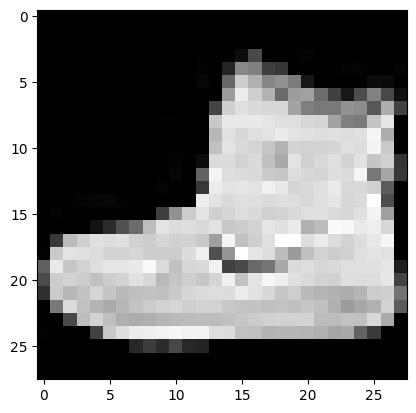

In [50]:
plt.imshow(image.squeeze(), cmap='gray')

In [51]:
model2(image.unsqueeze(0).to(device))

tensor([[ 0.0481, -0.1731,  0.1385, -0.0401, -0.1282,  0.1145, -0.0329, -0.0860,
         -0.0839, -0.1420]], grad_fn=<AddmmBackward0>)

##10.3 Setup loss functiona dn optimizer and evaluation metrics for model2 --->CNN

In [52]:
from helper_functions import accuracy_fn

loss_fn= nn.CrossEntropyLoss()

optimizer= tr.optim.SGD(params=model2.parameters(),
                        lr=0.1)

##10.4 Training and testing our model2 using training and testing functions (from 8.2)

In [53]:
tr.manual_seed(13)

#Measure time
from timeit import default_timer as timer

train_time_start_model2=timer()

#train and test
epoch = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epoch}\n ************')

  train_step(model=model2,
             data_loader=train_dataloader,
             loss_fn= loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
              device= device)

  test_step(model=model2,
            data_loader=test_dataloader,
            loss_fn= loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device= device)

train_time_end_model2=timer()

total_train_time_model2= print_train_time(start=train_time_start_model2,
                                          end=train_time_end_model2,
                                          device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
 ************
train loss : 1.1528, train accuracy : 55.83%
test loss : 0.4194, test accuracy : 84.52%
Epoch : 1
 ************
train loss : 0.3559, train accuracy : 86.95%
test loss : 0.3239, test accuracy : 88.61%
Epoch : 2
 ************
train loss : 0.2957, train accuracy : 88.97%
test loss : 0.3122, test accuracy : 88.75%
train time on cpu took 853.654 sec


In [54]:
model2_results=eval_model(model= model2,
                          data_loader= test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn= accuracy_fn)

model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV2',
 'model_loss': 0.31215396523475647,
 'model_accuracy': 88.74800319488818}

#11. Compare models and run times

In [55]:
import pandas as pd
compare_results = pd.DataFrame([model0_results,
                                model1_results,
                                model2_results])

compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTmodelV0,0.531111,82.338259
1,FashionMNISTmodelV1,0.753558,76.597444
2,FashionMNISTmodelV2,0.312154,88.748003


In [56]:
#add training time to results

compare_results['training_time'] = [total_train_time_model0,
                                    total_train_time_model1,
                                    total_train_time_model2]

compare_results

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTmodelV0,0.531111,82.338259,59.613703
1,FashionMNISTmodelV1,0.753558,76.597444,70.091619
2,FashionMNISTmodelV2,0.312154,88.748003,853.653934


Text(0, 0.5, 'model')

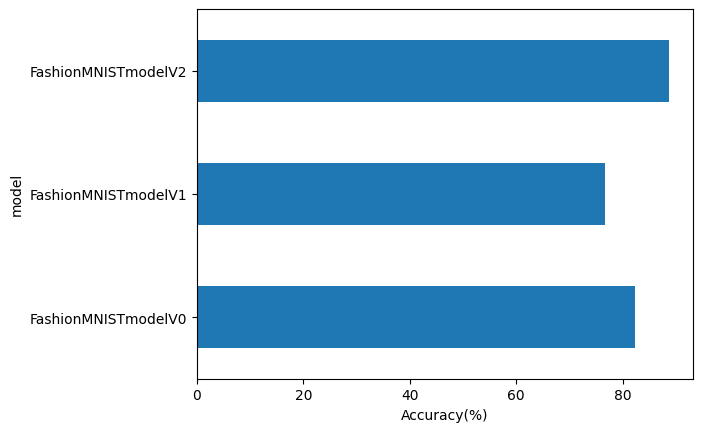

In [57]:
#Visualize the models
compare_results.set_index("model_name")['model_accuracy'].plot(kind='barh')
plt.xlabel('Accuracy(%)')
plt.ylabel("model")

Text(0, 0.5, 'Model')

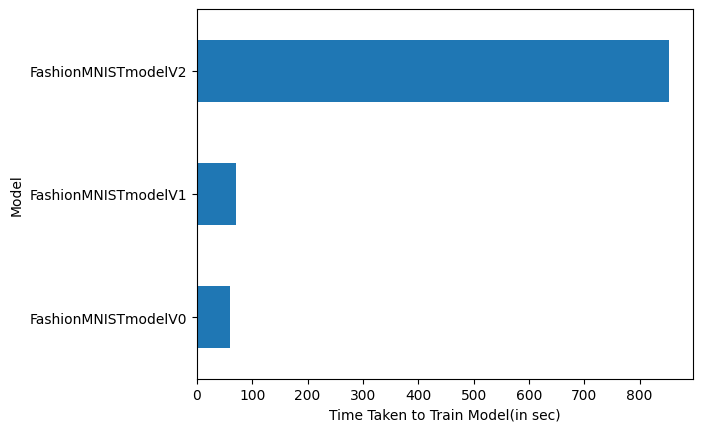

In [58]:
#Visualize the models
compare_results.set_index("model_name")['training_time'].plot(kind='barh')
plt.xlabel('Time Taken to Train Model(in sec)')
plt.ylabel("Model")

#12. Make and predict random predictions with best model --> model2 (CNN)

In [59]:
def make_predictions(model : tr.nn.Module,
                     data : list,
                     device : tr.device=device):
  pred_probs_total=[]
  model.to(device)
  model.eval()
  with tr.inference_mode():
    for sample in data:

      #prepare the sample (add a batch dimension and pass to target device)
      sample = tr.unsqueeze(sample, dim=0).to(device)

      #Forward pass (gives raw logits)
      pred_logit = model(sample)

      #Get prediction probability
      pred_prob= tr.softmax(pred_logit.squeeze(), dim=0)

      #adding predictions to list
      pred_probs_total.append(pred_prob.cpu())

  #stack the pred_probs_total to turn list into tensor

  return tr.stack(pred_probs_total)



In [60]:
import random

random.seed(14)
test_sample=[]
test_label=[]

for sample, label in random.sample(list(test_data), k=16):
  test_sample.append(sample)
  test_label.append(label)

#sample shapes
test_sample[5].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '7')

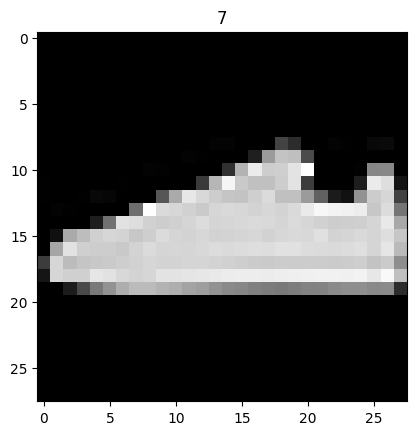

In [61]:
plt.imshow(test_sample[3].squeeze(), cmap='gray')
plt.title(test_label[3])

In [62]:
 #Make predictions

pred_probs = make_predictions(model=model2,
                              data = test_sample,
                              device = device)

pred_probs[:10]


tensor([[1.6514e-06, 1.1313e-07, 2.0200e-07, 2.4617e-07, 1.4864e-07, 3.2304e-04,
         1.3185e-07, 9.9948e-01, 2.5548e-05, 1.6465e-04],
        [6.0804e-04, 2.2349e-05, 6.1864e-05, 2.8467e-05, 7.5533e-05, 9.9038e-01,
         2.3205e-04, 2.6844e-04, 3.4210e-05, 8.2857e-03],
        [1.4817e-05, 4.7976e-07, 3.3713e-07, 4.0355e-06, 1.7008e-05, 8.1578e-04,
         3.4369e-06, 6.0235e-04, 1.0688e-05, 9.9853e-01],
        [7.4348e-06, 9.1539e-07, 1.5938e-06, 3.0551e-06, 4.0857e-06, 4.7391e-04,
         3.9981e-06, 9.9795e-01, 2.7508e-04, 1.2845e-03],
        [8.9088e-01, 1.8361e-06, 3.5341e-04, 4.2972e-04, 1.3745e-05, 5.0890e-07,
         1.0829e-01, 3.6863e-07, 2.1070e-05, 5.6669e-07],
        [6.5444e-05, 3.3005e-06, 1.1771e-05, 2.9729e-05, 5.9892e-06, 7.9719e-03,
         8.4817e-06, 9.8565e-01, 5.8873e-05, 6.1952e-03],
        [1.0792e-03, 7.9151e-06, 8.2168e-05, 2.2612e-05, 4.8591e-05, 7.1116e-05,
         7.8617e-04, 1.4916e-04, 9.9759e-01, 1.5916e-04],
        [1.0438e-02, 1.6182

In [63]:
pred_classes = pred_probs.argmax(dim=1)

pred_classes[:10]

tensor([7, 5, 9, 7, 0, 7, 8, 3, 3, 3])

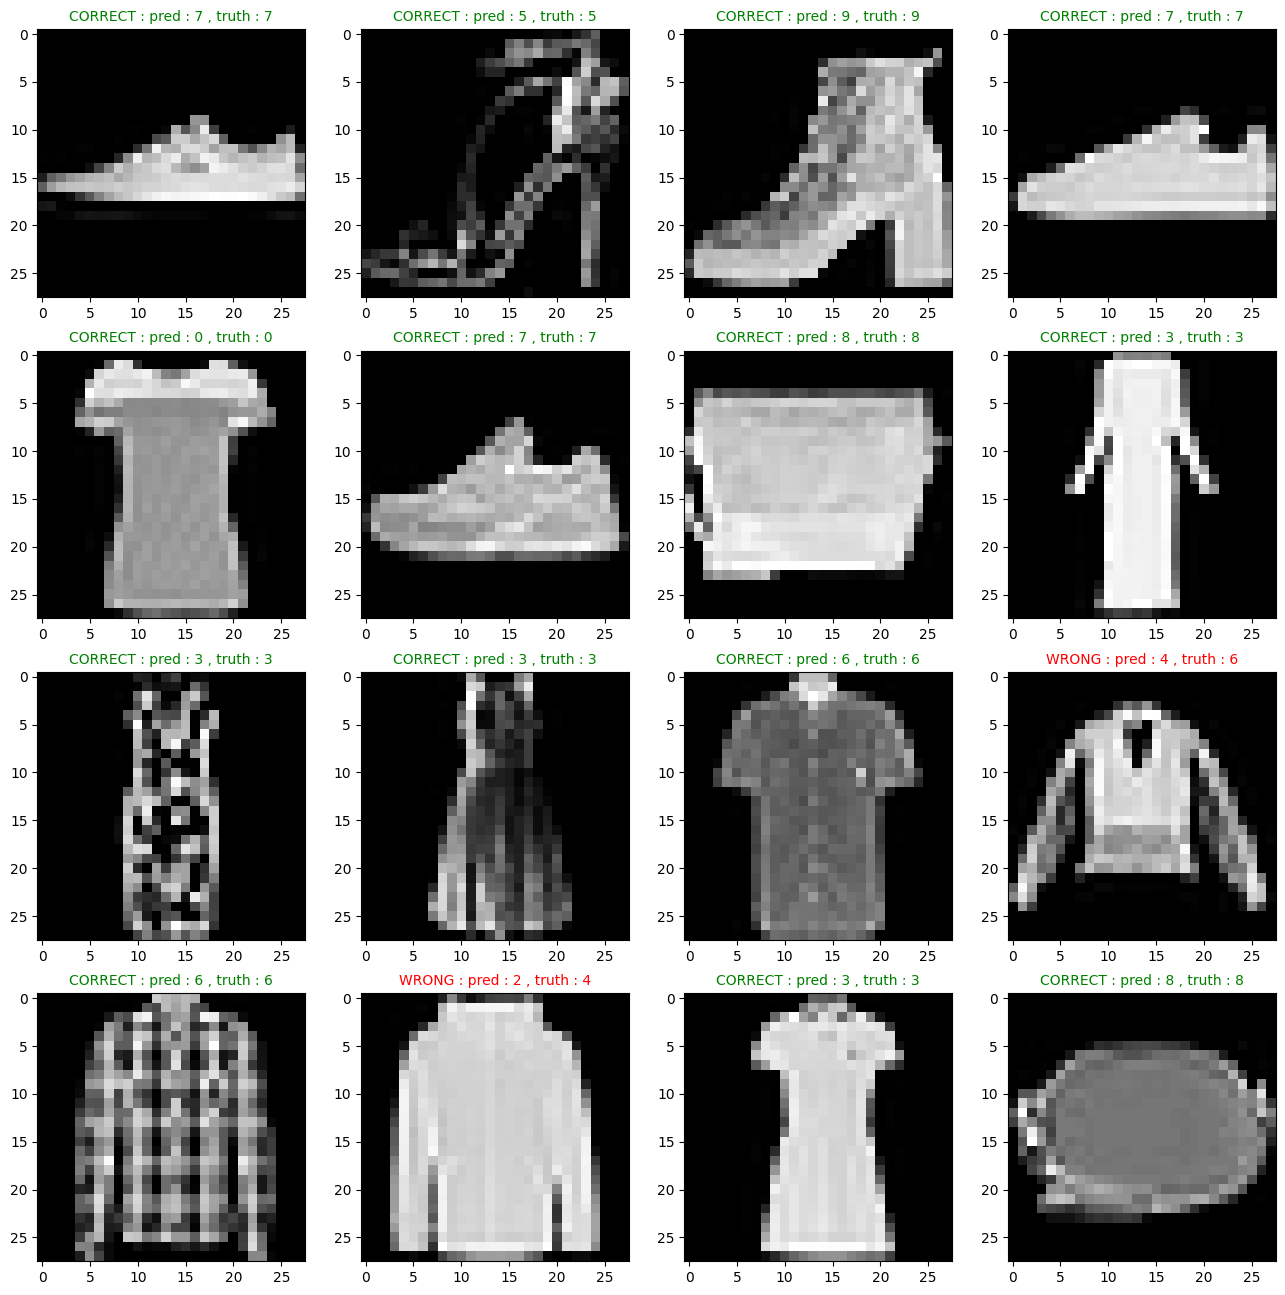

In [64]:
#Plot predictions

plt.figure(figsize=(16,16))
nrows=4
ncols=4

for i, sample in enumerate(test_sample):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap='gray')

  pred_label = pred_classes[i]
  truth_label = test_label[i]

  title_text= f'pred : {pred_label} , truth : {truth_label}'

  if pred_label==truth_label:
    plt.title('CORRECT : '+title_text, fontsize=10, c='g')
  else:
    plt.title('WRONG : '+title_text, fontsize=10, c='r')


#13. Making a confusion matrix for further prediction evaluation

In [65]:
import mlxtend

In [66]:
mlxtend.__version__

'0.22.0'

In [67]:
from tqdm.auto import tqdm

#1. make predictions with trained models
y_preds = []
model2.eval()

with tr.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making Predictions'):

    X, y =X.to(device), y.to(device)
    #creating logits
    y_logit = model2(X)
    #logits --> prediction probabilities
    y_pred_prob = tr.softmax(y_logit.squeeze(), dim=0)
    #prediction probabilities --> prediction labels
    y_pred_label= tr.argmax(y_pred_prob, dim=1)

    #putting to cpu and adding to list
    y_preds.append(y_pred_label.cpu())

#concatenate list of predictions into a tensor

y_pred_tensor = tr.cat(y_preds)

y_pred_tensor[:10]




classes=[0,1,2,3,4,5,6,7,8,9]

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [68]:
y

tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5])

In [69]:
y_pred_tensor

tensor([9, 2, 1,  ..., 8, 1, 0])

In [72]:
#installing torchmetrics and upgarding mlxtend
!pip install -q torchmetrics -U mlxtend
import torchmetrics
print(f'version of torchmetrics is : {torchmetrics.__version__}')
print(f'version of mlxtend is : {mlxtend.__version__}')

version of torchmetrics is : 1.3.2
version of mlxtend is : 0.22.0


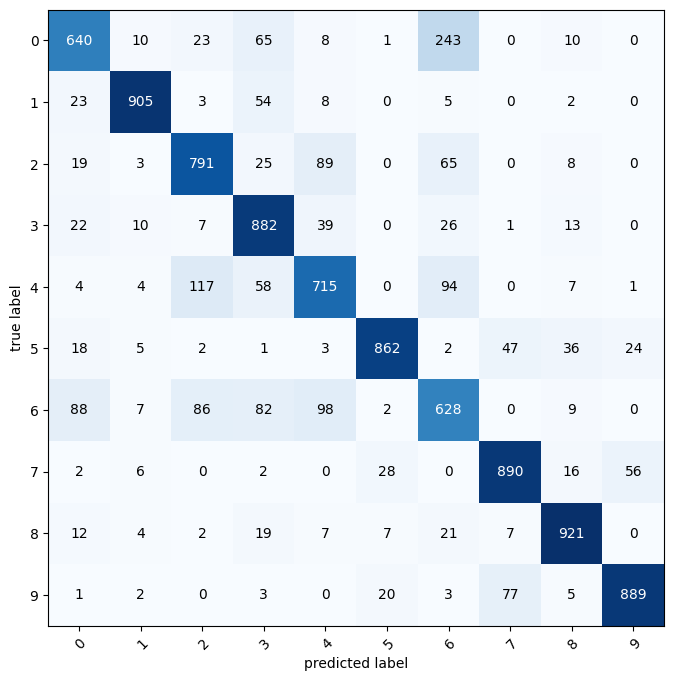

In [74]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
import torch

# Assuming y_pred_tensor and test_data.targets are your predicted and target tensors

# Convert tensors to numpy arrays
y_pred_np = y_pred_tensor.numpy()
targets_np = test_data.targets.numpy()

# Convert numpy arrays to tensors
y_pred_tensor = torch.from_numpy(y_pred_np)
targets_tensor = torch.from_numpy(targets_np)

# Initialize ConfusionMatrix object
confmat = ConfusionMatrix(num_classes=10, task='multiclass')

# Compute confusion matrix
conf_mat_tesnor= confmat(y_pred_tensor, targets_tensor)


#plotting the confusion matrix graph

fig, ax = plot_confusion_matrix(
    conf_mat=conf_mat_tesnor.numpy(),  # convert to numpy array
    class_names=classes,
    figsize=(10, 8)
)


In [75]:
conf_mat_tesnor

tensor([[640,  10,  23,  65,   8,   1, 243,   0,  10,   0],
        [ 23, 905,   3,  54,   8,   0,   5,   0,   2,   0],
        [ 19,   3, 791,  25,  89,   0,  65,   0,   8,   0],
        [ 22,  10,   7, 882,  39,   0,  26,   1,  13,   0],
        [  4,   4, 117,  58, 715,   0,  94,   0,   7,   1],
        [ 18,   5,   2,   1,   3, 862,   2,  47,  36,  24],
        [ 88,   7,  86,  82,  98,   2, 628,   0,   9,   0],
        [  2,   6,   0,   2,   0,  28,   0, 890,  16,  56],
        [ 12,   4,   2,  19,   7,   7,  21,   7, 921,   0],
        [  1,   2,   0,   3,   0,  20,   3,  77,   5, 889]])

#14. Saving the best performing model

In [76]:
from pathlib import Path

#create model path directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

#create model save
MODEL_NAME = 'pytorch_computer_vision_model2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model state dict
print(f'saving the model to {MODEL_SAVE_PATH}')
tr.save(obj = model2.state_dict(),
        f=MODEL_SAVE_PATH)


saving the model to models/pytorch_computer_vision_model2.pth


In [77]:
#create a new instance

tr.manual_seed(13)

loaded_model_2= FashionMNISTmodelV2(input_shape = 1 , #3 for colored images
                             hidden_units = 32,
                             output_shape = 10).to(device)

loaded_model_2.load_state_dict(tr.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTmodelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out

In [78]:
#evaluate the loaded model

tr.manual_seed(13)

loaded_model2_results=eval_model(model= loaded_model_2,
                          data_loader= test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn= accuracy_fn)

loaded_model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV2',
 'model_loss': 0.31215396523475647,
 'model_accuracy': 88.74800319488818}

In [79]:
model2_results

{'model_name': 'FashionMNISTmodelV2',
 'model_loss': 0.31215396523475647,
 'model_accuracy': 88.74800319488818}